<a href="https://colab.research.google.com/github/Sharik2610/-NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/Personal_colab_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Netflix Movies and TV Shows Clustering**



##### **Project Type**    - Unsupervised



# **Project Summary -**

* Netflix, the world's leading streaming service, boasts an impressive 209 million paid memberships across 190 countries, offering a diverse array of TV series, documentaries, and feature films. Despite the absence of user-specific information, our project delved into the analysis of the available movie and show data, focusing on clustering similar items rather than personalized recommendations.

* The initial phase involved meticulous data cleaning, addressing discrepancies between dates and handling null values by replacing them with 'Unavailable.' Subsequently, we delved into exploring the dataset, gaining insights into various rating content densities and scrutinizing whether Netflix's focus had shifted towards TV shows. Our analysis highlighted that while Netflix has intensified its focus on TV shows, it remains committed to maintaining a robust library of movies.

* To enhance user experience, we developed a comprehensive 'welcome' function, offering users insights into different genres and types of rating content available in their chosen country. Additionally, we harnessed the power of the NearestNeighbors model, employing cosine similarity as a metric to recommend data based on the content of a selected show or film. Furthermore, we leveraged Spectral Clustering as a second model, facilitating the identification of distinct clusters within the dataset.

* Through these comprehensive analyses and modeling techniques, our project aimed to provide a holistic understanding of the content landscape on Netflix, ultimately enriching the streaming experience for users worldwide.

# **GitHub Link -**

https://github.com/Sharik2610/-NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING

# **Problem Statement**


* This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

* In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

* Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

In this project, you are required to do:
* Exploratory Data Analysis

* Understanding what type content is available in different countries

* Is Netflix has increasingly focusing on TV rather than movies in recent years.

* Clustering similar content by matching text-based features

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

# importing the packages:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

### Dataset Loading

In [ ]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
# Dataset path

df_path = '/content/drive/MyDrive/AlmaBetter/Capstone/Clustering Project On Netlix TV Shows and Movies Clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'

In [ ]:
# Load Dataset
df = pd.read_csv(df_path)

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count

print('Dataset have {} rows and {} columns'.format(df.shape[0], df.shape[1]))
df.shape

Dataset have 7787 rows and 12 columns


(7787, 12)

### Dataset Information

In [ ]:
# Dataset Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

No_of_duplicate_rows=df[df.duplicated()].shape[0]
print(f'we hve total no {No_of_duplicate_rows} duplicate rows.')

we hve total no 0 duplicate rows.


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

df.isna().sum().sort_values(ascending=False)[:].reset_index().rename(columns = {'index':'columns',0:'null values'})

,columns,null values
0,director,2389
1,cast,718
2,country,507
3,date_added,10
4,rating,7
5,show_id,0
6,type,0
7,title,0
8,release_year,0
9,duration,0


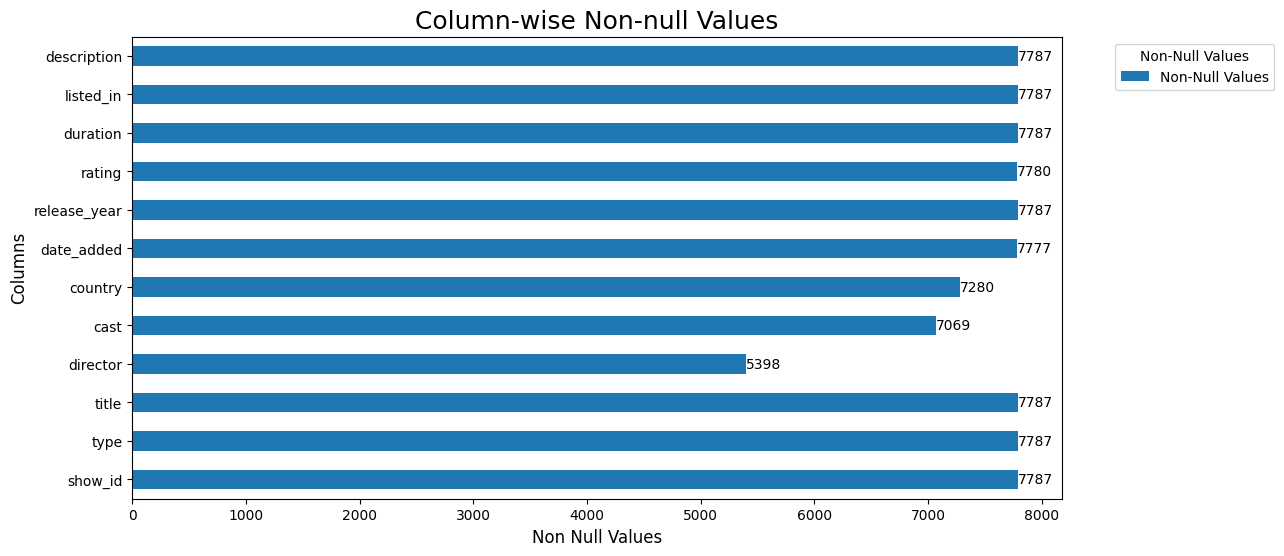

In [ ]:
# Visualizing the missing values

# Creating a new dataset of number of non-null values in each column
Non_null_df = df.notnull().sum().reset_index().rename(columns = {'index' : 'columns', 0 : "Non-Null Values"})

# Plotting of the Non-null-df
ax = Non_null_df.plot(kind = 'barh', x = 'columns', figsize=(12,6))

#Labelling of each bars in the plot
ax.bar_label(ax.containers[0])

#Set x-axis labels and y-axis labels
plt.ylabel('Columns', {'fontsize': 12, 'fontweight': 15})
plt.xlabel("Non Null Values", {'fontsize': 12, 'fontweight': 15})
plt.legend(title="Non-Null Values", bbox_to_anchor=(1.05, 1), loc=2)
#set plot title
plt.title('Column-wise Non-null Values',{'fontsize': 18, 'fontweight': 20})
plt.show()

### What did you know about your dataset?

* We have a total of 7787 rows and 12 columns in our dataset.
* We have no duplicate values in our dataset which makes it easier to work with.
* We have **2389** missing values in the feature **director**, **718** missing values in the feature **cast**, **507** missing values in the feature **country**, **10** missing values in the feature the **date_added** and **7** missing values in the feature **rating**.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,7787.0,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0


### Variables Description

The attrbutes in this dataset are:

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

* release_year is the only feature in this dataset with int64 dtype.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

def unique_values(dF):
    unique_vals = []
    for col in dF.columns:
        unique_vals.append(dF[col].unique())

    return unique_vals

print(unique_values(df))

[array(['s1', 's2', 's3', ..., 's7785', 's7786', 's7787'], dtype=object), array(['TV Show', 'Movie'], dtype=object), array(['3%', '7:19', '23:59', ..., 'Zulu Man in Japan',
       "Zumbo's Just Desserts", "ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS"],
      dtype=object), array([nan, 'Jorge Michel Grau', 'Gilbert Chan', ..., 'Josef Fares',
       'Mozez Singh', 'Sam Dunn'], dtype=object), array(['João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi',
       'Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato',
       'Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim',
       ...,
       'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy',
       'Nasty C', 'Adriano Zumbo, Rachel Khoo'], dtype=o

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Dropping entries with missing date
df = df[df['date_added'].notna()].reset_index().drop('index',axis = 1)

In [ ]:
# Fill all the other missing values with "Únavailable"

df = df.fillna('Unavailable')

In [ ]:
# Check the missing values

df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
# Change the data type for date_added

df["date_added"] = pd.to_datetime(df['date_added'])

In [ ]:
# Adding a new column named added_year, and added_month

df['added_year'] = df['date_added'].dt.year
df['added_month'] =df['date_added'].dt.month

In [ ]:
# Check the dataset

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month
0,s1,TV Show,3%,Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1


In [ ]:
# Check entries if added_year is earlier than release_year

df[df['added_year']<df['release_year']][['show_id','release_year','added_year']]

,show_id,release_year,added_year
581,s584,2019,2018
1023,s1026,2020,2019
2307,s2312,2020,2019
2597,s2603,2018,2017
2736,s2742,2021,2020
2976,s2982,2019,2018
3093,s3099,2016,2013
3919,s3927,2020,2019
5484,s5494,2018,2016
6452,s6463,2020,2019


In [ ]:
# We remove those entries with added year earlier than the release year

df = df[df['added_year']>=df['release_year']].reset_index().drop('index',axis = 1)

In [ ]:
# Converting duration from string document to int document
df['duration']=df['duration'].str.replace('Season','')
df['duration']=df['duration'].str.replace('s','')
df['duration']=df['duration'].str.replace('min','')

df['duration']=df['duration'].astype(str).astype(int)
df['duration']

0         4
1        93
2        78
3        80
4       123
       ... 
7760     99
7761    111
7762     44
7763      1
7764     90
Name: duration, Length: 7765, dtype: int64

In [ ]:
# Show the dataset

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month
0,s1,TV Show,3%,Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,2020,1


### What all manipulations have you done and insights you found?

* We have removed all the entries with no date_added.
* We have replace all the other missing values with "Unavailable".
* We have changed the date_added column to an datetime object.
* We have created a new column named 'added_year' and 'added_month'.
* We have removed all the entries that have added_year earlier than the release_year.
* We also converted the string document from the duration to int64.

## ***4. Data Preprocesing***



In [ ]:
# Import re to preprocess text based features

import re

In [ ]:
# Create a function which will remove the extra spaces and convert the multiple entries of a feature into list of data

def text_process(x):

  return re.split(',\s*',x)

In [ ]:
# Create a copy of your dataset to apply the text process function

df_new = df.copy()

# Show the df_new
df_new

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month
0,s1,TV Show,3%,Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7760,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020,10
7761,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019,3
7762,s7785,Movie,Zulu Man in Japan,Unavailable,Nasty C,Unavailable,2020-09-25,2019,TV-MA,44,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020,9
7763,s7786,TV Show,Zumbo's Just Desserts,Unavailable,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020,10


In [ ]:
# Apply the text process function to columns such as director, cast, country and listed_in

df_new['country'] = df_new['country'].apply(text_process)
df_new['listed_in'] = df_new['listed_in'].apply(text_process)
df_new['cast']= df_new['cast'].apply(text_process)
df_new['director']= df_new['director'].apply(text_process)

In [ ]:
# Check the dataset

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month
0,s1,TV Show,3%,Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,2020,1


## ***5. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 : Proportion of Movies and TV Series

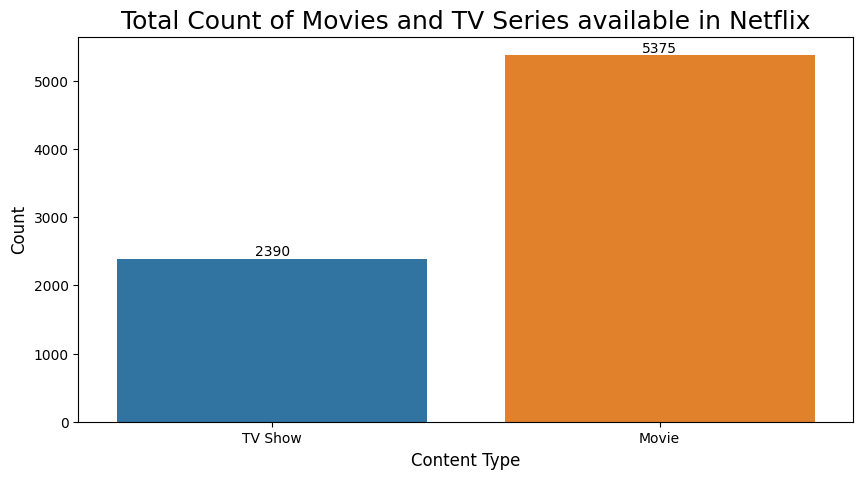

In [ ]:
# Chart - 1 : Total Count of Movies and TV Series available in Netflix

# set figure size
plt.figure(figsize=(10,5))

# Set up the plot title
plt.title('Total Count of Movies and TV Series available in Netflix', {'fontsize': 18, 'fontweight': 20})

# Plot the countplot
fig1 = sns.countplot(x = 'type', data = df_new)

# labels for each bar
for container in fig1.containers:
    fig1.bar_label(container)

# set x-axis and y-axis labels
plt.xlabel("Content Type", {'fontsize': 12, 'fontweight': 15})
plt.ylabel("Count", {'fontsize': 12, 'fontweight': 15})

# display figure
plt.show()

##### 1. Why did you pick the specific chart?

To understad what is the distribution of content in Netflix.

##### 2. What is/are the insight(s) found from the chart?

We can see that we have 2390 TV shows and 5375 Movies available in Netflix.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* More TV shows/ Web Series must be added to netflix as Web Series has higher screening time as compared to movies.

#### Chart - 2 : Content Added Yearwise

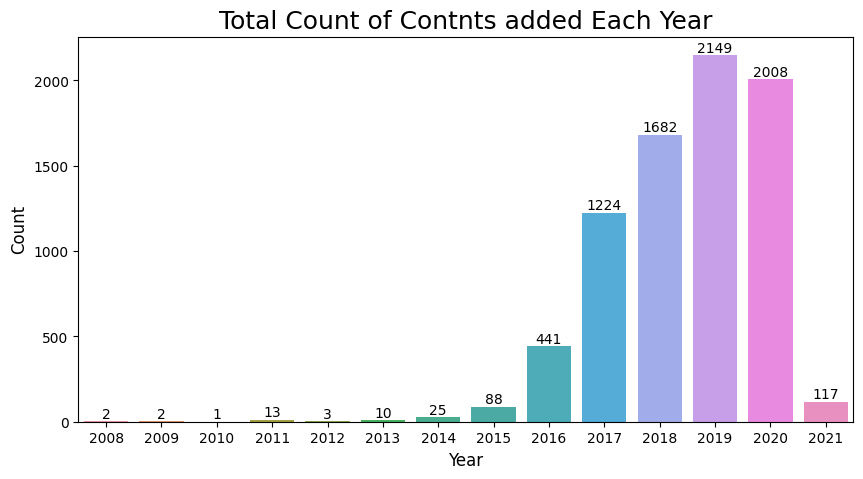

In [ ]:
# Chart - 2: Content Added Year-wise

# set figure size
plt.figure(figsize=(10,5))

# Set up the plot title
plt.title('Total Count of Contnts added Each Year', {'fontsize': 18, 'fontweight': 20})

# Plot the countplot
fig2 = sns.countplot(x = 'added_year', data = df_new)

# labels for each bar
for container in fig2.containers:
    fig2.bar_label(container)

# set x-axis and y-axis labels
plt.xlabel("Year", {'fontsize': 12, 'fontweight': 15})
plt.ylabel("Count", {'fontsize': 12, 'fontweight': 15})

# display figure
plt.show()

##### 1. Why did you pick the specific chart?

It shows year wise how much contenet has been added into the Netflix library.

##### 2. What is/are the insight(s) found from the chart?

We have seen a steady increase of number of contents over the years, until 2020.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The number of contents added in Netflix has decreased from the year 2019 to 2020. This could be an impact of COVID- 19. We have to wait some time till everything gets normalize which will make movies and shows production easier.

#### Chart - 3  : Content Added Monthwise

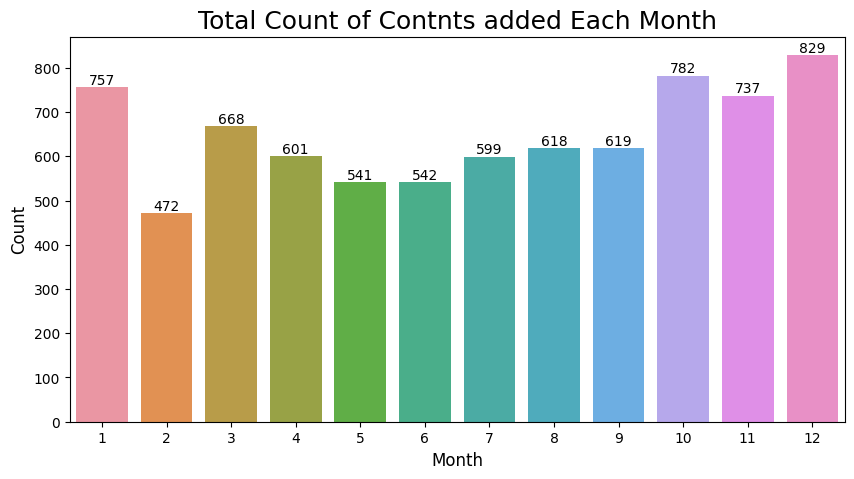

In [ ]:
# Chart - 3 : Content added monthwise

# set figure size
plt.figure(figsize=(10,5))

# Set up the plot title
plt.title('Total Count of Contnts added Each Month', {'fontsize': 18, 'fontweight': 20})

# Plot the countplot
fig3 = sns.countplot(x = 'added_month', data = df_new)

# labels for each bar
for container in fig3.containers:
    fig3.bar_label(container)

# set x-axis and y-axis labels
plt.xlabel("Month", {'fontsize': 12, 'fontweight': 15})
plt.ylabel("Count", {'fontsize': 12, 'fontweight': 15})

# display figure
plt.show()

##### 1. Why did you pick the specific chart?

We have picked this chart to analyze in which months most contents are added to Netflix.

##### 2. What is/are the insight(s) found from the chart?

We have seen that the most contents are posted during the holidays and festive times of the year, ie, from October to January.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

In festive and holiday season the most number of contents are posted but in February- June the number of content posted in less, more contenets in this time also will result into higher streaminng.

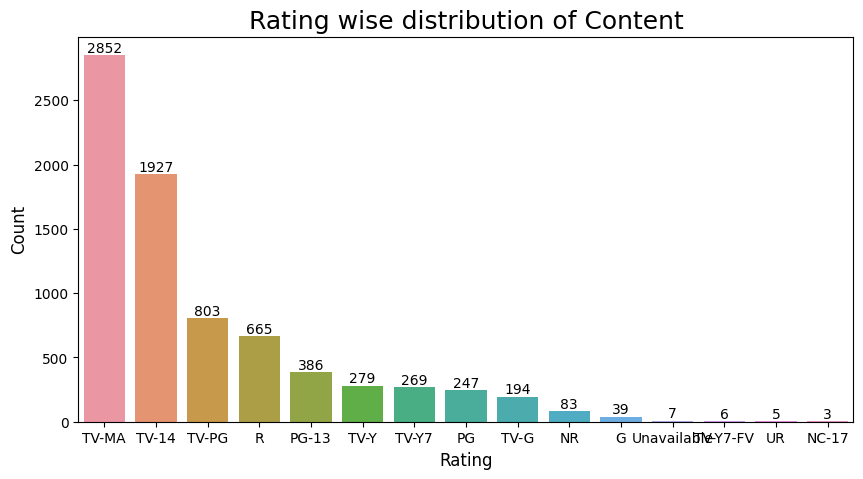

In [ ]:
# Chart - 4 : Rating-wise distribution of content

# set figure size
plt.figure(figsize=(10,5))

# Set up the plot title
plt.title('Rating wise distribution of Content', {'fontsize': 18, 'fontweight': 20})

# Plot the countplot
fig4 = sns.countplot(x = 'rating', data = df_new, order = df_new['rating'].value_counts().index)

# labels for each bar
for container in fig4.containers:
    fig4.bar_label(container)

# set x-axis and y-axis labels
plt.xlabel("Rating", {'fontsize': 12, 'fontweight': 15})
plt.ylabel("Count", {'fontsize': 12, 'fontweight': 15})

# display figure
plt.show()

##### **TV and Movie ratings**





1.   TV-Y - programs aimed at a very young audience, including children from ages 2-6.
2. TV-Y7 - programs most appropriate for children age 7 and up.
3. TV-Y7-FV - programming with fantasy violence that may be more intense or more combative than other programming in the TV-Y7 category.
4. TV-G - programs suitable for all ages; these are not necessarily children's shows.
5. TV-PG - parental guidance is recommended; these programs may be unsuitable for younger children.
6. TV-14 - these shows may be unsuitable for children under 14.
7. TV-MA - these programs are intended to be viewed by mature, adult audiences and may be unsuitable for children under 17.
8. UR/NR -Film has not been submitted for a rating or is an uncut version of a film that was submitted
9. G: All people can see it.
10. PG: Parents must see it with a child or okay it.
11. PG-13:Parents must okay if under 13.
12. R: Parents must okay if under 18.
13. NC-17: You MUST be over 17 to see it, no exceptions!

##### 1. Why did you pick the specific chart?

Picked this countplot to analyse the type of content available on Netflix to know if it caters to the entertainment need of all beyond the age factor or this is specific to some age group.

##### 2. What is/are the insight(s) found from the chart?

We can see from here that TV-MA, TV-14 and TV-PG are top 3 ratings in terms of number of uloads.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Mostly the contents uploaded are targeted towards young adults, but contents for kids should be in the focus more to attract parents and children alike to watch the shows/movies.

#### Chart - 5: Distriution of TV Shows and Movies added yearwise

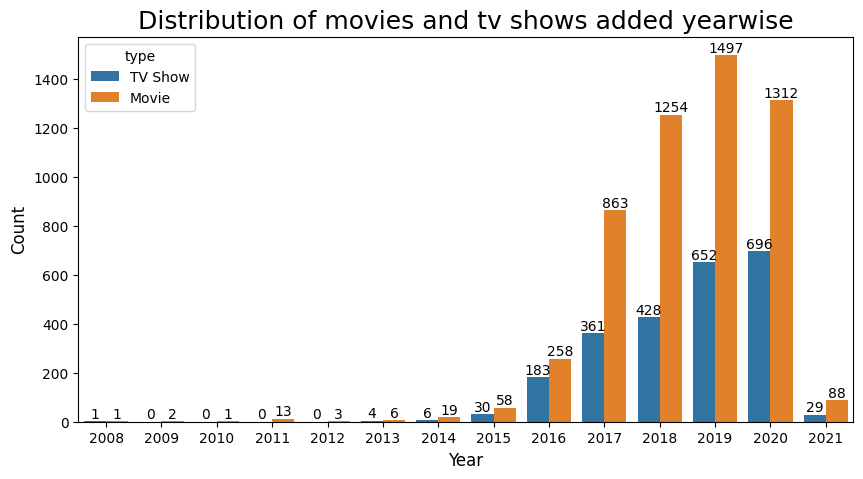

In [ ]:
# Chart - 5: Distribution of movies and tv shos added yearwise

# set figure size
plt.figure(figsize=(10,5))

# Set up the plot title
plt.title('Distribution of movies and tv shows added yearwise', {'fontsize': 18, 'fontweight': 20})

# Plot the countplot
fig5 = sns.countplot(x = 'added_year', hue = 'type', data = df_new)

# labels for each bar
for container in fig5.containers:
    fig5.bar_label(container)

# set x-axis and y-axis labels
plt.xlabel("Year", {'fontsize': 12, 'fontweight': 15})
plt.ylabel("Count", {'fontsize': 12, 'fontweight': 15})

# display figure
plt.show()

##### 1. Why did you pick the specific chart?

So as to analyse per year growth of the amount of the content of these type of contents.

##### 2. What is/are the insight(s) found from the chart?

It seems that per year growth of movies is better than that of TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Since 2016, the rate of number of TV shows produced by netflix has decreased as compared to the movies, so, it is needed to be increased.

#### Chart - 6 : Top 10 Genres on Netflix

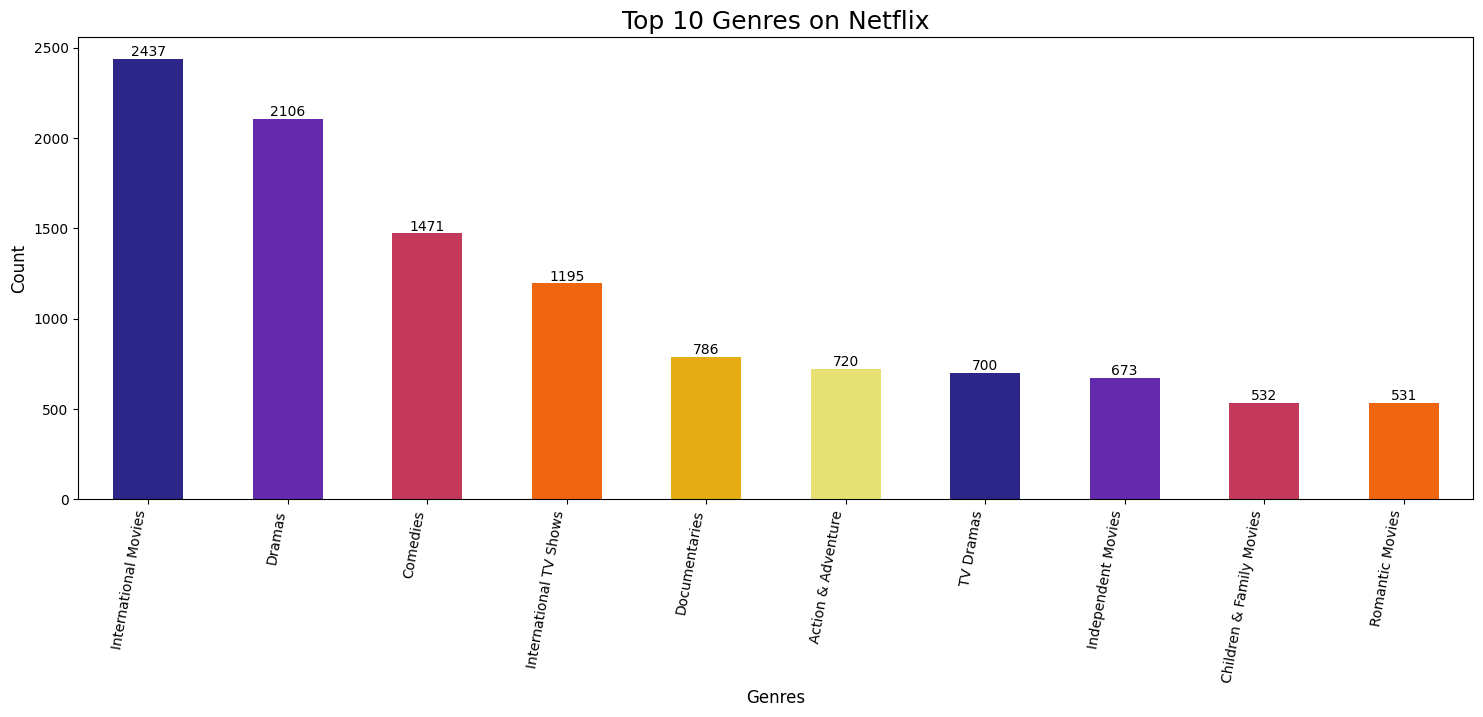

In [ ]:
# Chart - 6 : Top 10 Genres on Netflix

# Create the genre ist
genre_list = [genre for sublist in df_new['listed_in'] for genre in sublist]

# Create each genre counts from the list
genre_counts = pd.Series(genre_list).value_counts()

# Top 10 genres
top10_genre = genre_counts.head(10)

# set figure size
plt.figure(figsize=(18,6))

# Set up the plot title
plt.title('Top 10 Genres on Netflix', {'fontsize': 18, 'fontweight': 20})

# Set the palette
custom_palette = sns.color_palette("CMRmap")

# Plot the diagram
fig6 = top10_genre.plot (kind = 'bar', color = custom_palette)

# labels for each bar
for container in fig6.containers:
    fig6.bar_label(container)

# set x-axis and y-axis labels
plt.xlabel("Genres", {'fontsize': 12, 'fontweight': 15})
plt.ylabel("Count", {'fontsize': 12, 'fontweight': 15})

# Set plot layout

plt.xticks(rotation = 80, ha="right")

# display figure
plt.show()

##### 1. Why did you pick the specific chart?

We want to find out the most famous genre of shows in Netflix.

##### 2. What is/are the insight(s) found from the chart?

We find out that International movies, Dramas and Comedies are the top 3 genre in Netflix.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From this we can evaluate what genre is most famous so that we can make the clustering decisions based on that.

#### Chart - 7 : Top 20 Cast on Netflix

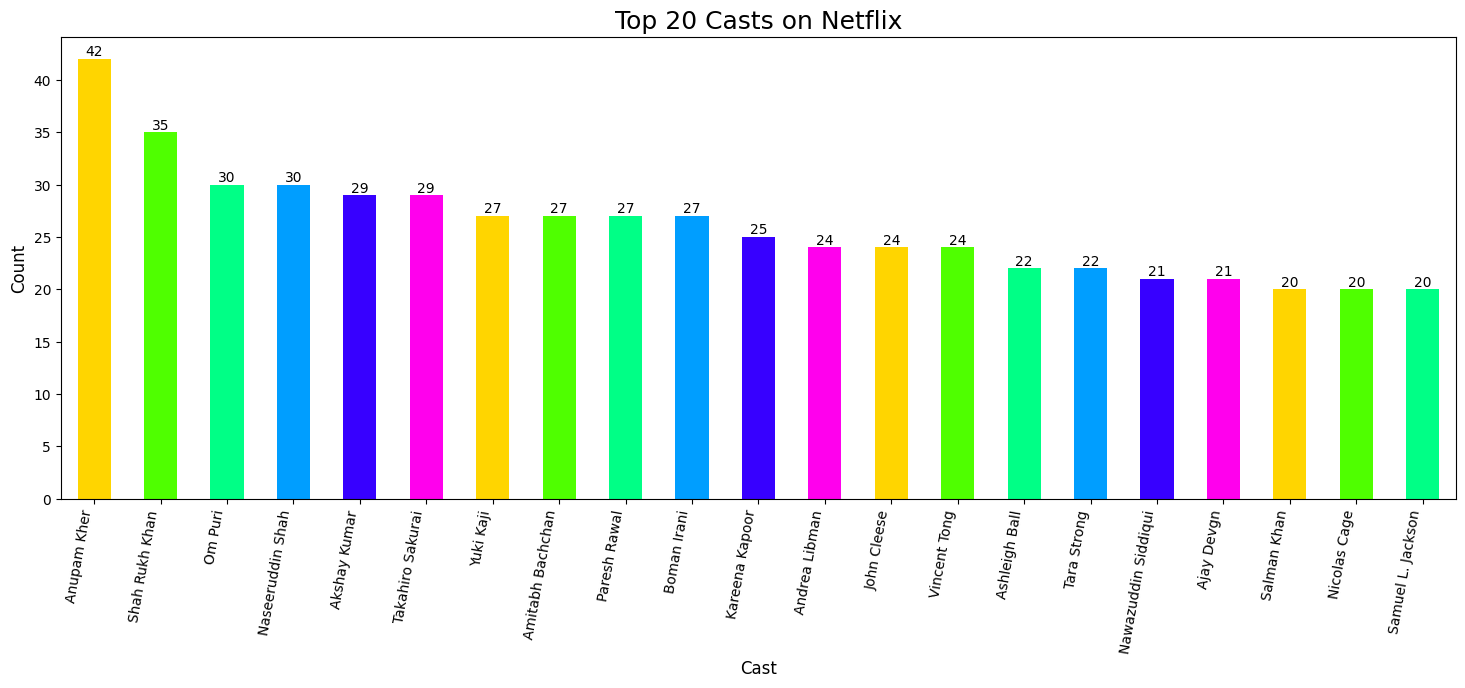

In [ ]:
# Chart - 7: Top 20 Cast on Netflix

# Create the cast ist
cast_list = [cast for sublist in df_new['cast'] for cast in sublist]

# Create each cast counts from the list
cast_counts = pd.Series(cast_list).value_counts()

# Top 20 casts
top20_cast = cast_counts[1:22]  # We are removing the Unavailable name from the cast list is it is top most

# set figure size
plt.figure(figsize=(18,6))

# Set up the plot title
plt.title('Top 20 Casts on Netflix', {'fontsize': 18, 'fontweight': 20})

# Set the palette
custom_palette = sns.color_palette("hsv")

# Plot the diagram
fig7 = top20_cast.plot (kind = 'bar', color =custom_palette)

# labels for each bar
for container in fig7.containers:
    fig7.bar_label(container)

# set x-axis and y-axis labels
plt.xlabel("Cast", {'fontsize': 12, 'fontweight': 15})
plt.ylabel("Count", {'fontsize': 12, 'fontweight': 15})

# Set plot layout

plt.xticks(rotation = 80, ha="right")

# display figure
plt.show()

##### 1. Why did you pick the specific chart?

We picked this list to find out the most famous actors in Netflix.

##### 2. What is/are the insight(s) found from the chart?

We can see from here that, Anupam Kher, Shah Rukh Khan, Om Puri and Naseruddin Shah are featured in most contents in Netflix.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From here, we can decide what casts are famous and we can promote more of their featured movies and TV shows for better revenue.

#### Chart - 8 : Top 10 Directors

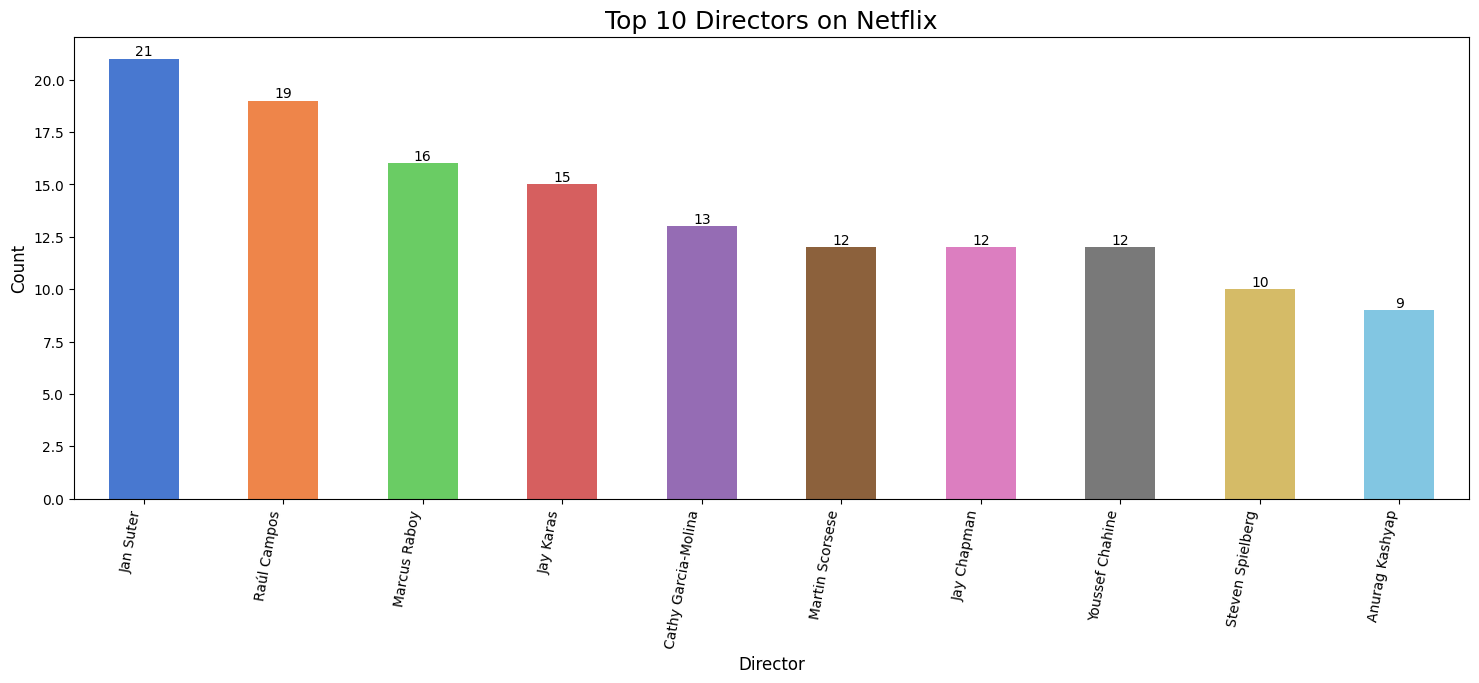

In [ ]:
# Chart - 8: Top 10 Directors

# Create the director ist
dir_list = [dir for sublist in df_new['director'] for dir in sublist]

# Create each director counts from the list
dir_counts = pd.Series(dir_list).value_counts()

# Top 10 directors
top10_dir = dir_counts[1:11]  # We are removing the Unavailable name from the cast list is it is top most

# set figure size
plt.figure(figsize=(18,6))

# Set up the plot title
plt.title('Top 10 Directors on Netflix', {'fontsize': 18, 'fontweight': 20})

# Set the palette
custom_palette = sns.color_palette("muted")

# Plot the diagram
fig8 = top10_dir.plot (kind = 'bar', color = custom_palette)

# labels for each bar
for container in fig8.containers:
    fig8.bar_label(container)

# set x-axis and y-axis labels
plt.xlabel("Director", {'fontsize': 12, 'fontweight': 15})
plt.ylabel("Count", {'fontsize': 12, 'fontweight': 15})

# Set plot layout
plt.xticks(rotation = 80, ha="right")

# display figure
plt.show()

##### 1. Why did you pick the specific chart?

We can find the top 10 directors with most projects in Netflix.

##### 2. What is/are the insight(s) found from the chart?

The top 3 most famous directors in Netflix are: Jan Suter, Raúl Campos and Marcus Raboy.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

According to this list, we can get more projects from the most famous directors on our streaming service.

#### Chart - 9 : Top 20 Countries

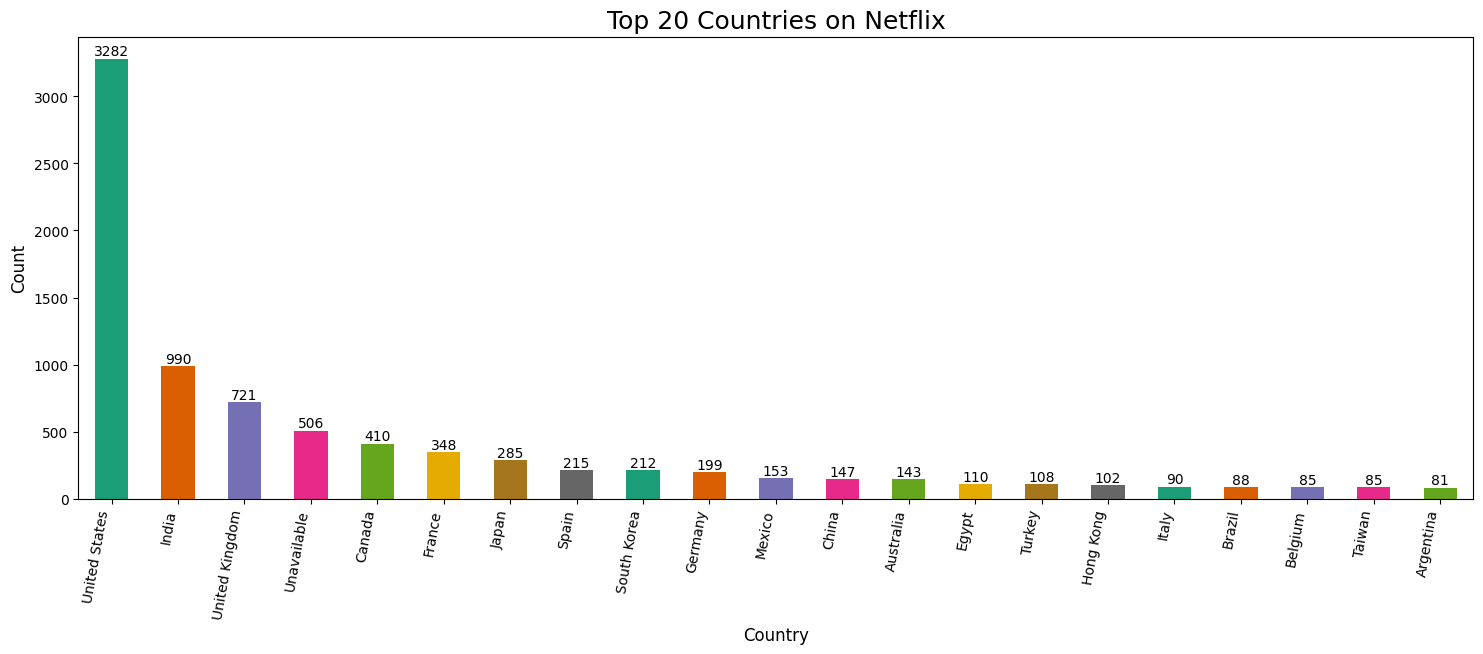

In [ ]:
# Chart - 9 : Top 20 Countries

# Create the country ist
cntr_list = [cntr for sublist in df_new['country'] for cntr in sublist]

# Create each country counts from the list
cntr_counts = pd.Series(cntr_list).value_counts()

# Top 20 country
top20_cntr = cntr_counts[0:21]  # We are removing the Unavailable name from the cast list is it is top most

# set figure size
plt.figure(figsize=(18,6))

# Set up the plot title
plt.title('Top 20 Countries on Netflix', {'fontsize': 18, 'fontweight': 20})

# Set the palette
custom_palette = sns.color_palette("Dark2")

# Plot the diagram
fig9 = top20_cntr.plot (kind = 'bar', color = custom_palette)

# labels for each bar
for container in fig9.containers:
    fig9.bar_label(container)

# set x-axis and y-axis labels
plt.xlabel("Country", {'fontsize': 12, 'fontweight': 15})
plt.ylabel("Count", {'fontsize': 12, 'fontweight': 15})

# Set plot layout
plt.xticks(rotation = 80, ha="right")

# display figure
plt.show()

##### 1. Why did you pick the specific chart?

We can see which countries produces the most content for Netflix from this chart.

##### 2. What is/are the insight(s) found from the chart?

The top 3 countries with most contents produced in Netflix: United States, India, United Kingdom.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can promote more quality contents from countries who dont feature in this list to get even a wider range of customers.

#### Chart- 10: Distribution of Length of Movies

<ipython-input-279-0d2b1af800f4>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(movie_df['duration'], bins=30,color='Blue').set(ylabel=None)


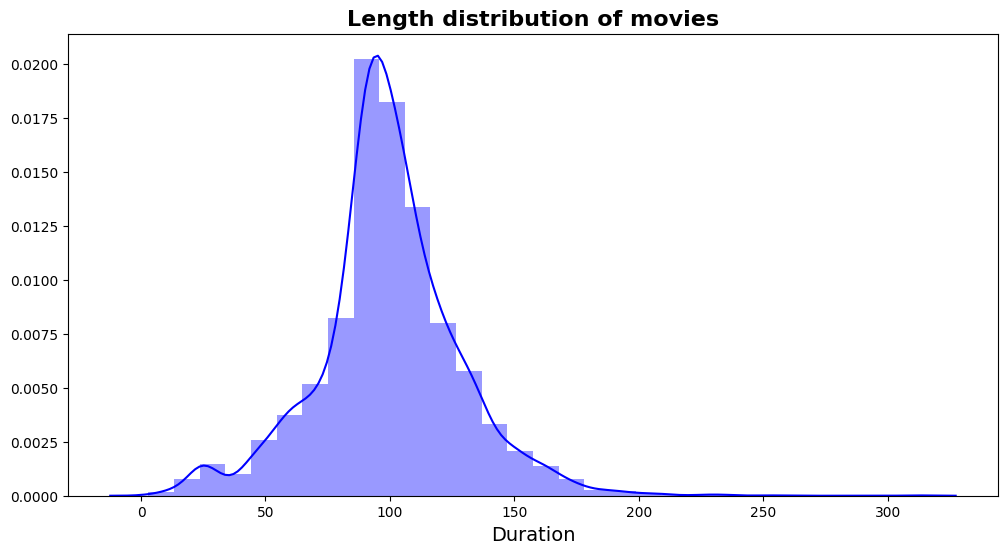

In [ ]:
# Chart - 10 : Distribution of length of movies

# Create a New dataset
movie_df = df_new[df_new['type']=='Movie']

# Set figure size
plt.figure(figsize=(12, 6))

# Plot the distribution plot
sns.distplot(movie_df['duration'], bins=30,color='Blue').set(ylabel=None)

# Set title
plt.title('Length distribution of movies', fontsize=16,fontweight="bold")

# Set label
plt.xlabel('Duration', fontsize=14)

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

We can determine the distribution of duration of movies in Netflix.

##### 2. What is/are the insight(s) found from the chart?

We can find that the most movies are in the 100 minute duration range.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can predict what is the average length of movies the viewers like to watch from this and can limit the future projects according to that.

## ***6. Problem Statement:*** **Analyzing What Type of Content Available in Different Countries**


### **Analysis Steps overview:**

1. First we will try to understand the type of content available in different countries--- created dataframe 'country_type'
2. Then we understand the genres of content available in different countries--- created dataframe 'country_and_genre' and created a function 'country_genre' to extract all the genres available in that country.
3. Further created a function called 'welcome' which sum up all the items based on country and give user the list of content available on Netflix as per user specifications.

### **1. Analyzing the types of content available in different countries- created dataframe 'country_type'.**

In [ ]:
# Countries-genre-ratings DataFrame:
country_df= df_new.loc[:,['title','country','listed_in','rating','type']].copy()

# Show country_df

country_df.head(5)

,title,country,listed_in,rating,type
0,3%,[Brazil],"[International TV Shows, TV Dramas, TV Sci-Fi ...",TV-MA,TV Show
1,7:19,[Mexico],"[Dramas, International Movies]",TV-MA,Movie
2,23:59,[Singapore],"[Horror Movies, International Movies]",R,Movie
3,9,[United States],"[Action & Adventure, Independent Movies, Sci-F...",PG-13,Movie
4,21,[United States],[Dramas],PG-13,Movie


In [ ]:
# Explode the country_df

country_df = country_df.explode(['country']).explode('listed_in').reset_index().drop('index',axis= 1)

#Show the dataset
country_df

,title,country,listed_in,rating,type
0,3%,Brazil,International TV Shows,TV-MA,TV Show
1,3%,Brazil,TV Dramas,TV-MA,TV Show
2,3%,Brazil,TV Sci-Fi & Fantasy,TV-MA,TV Show
3,7:19,Mexico,Dramas,TV-MA,Movie
4,7:19,Mexico,International Movies,TV-MA,Movie
...,...,...,...,...,...
20888,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,United Kingdom,Music & Musicals,TV-MA,Movie
20889,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Canada,Documentaries,TV-MA,Movie
20890,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Canada,Music & Musicals,TV-MA,Movie
20891,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,United States,Documentaries,TV-MA,Movie


In [ ]:
# Create the dataframe country_type
country_type = country_df.groupby(['country','type']).count()['title'].unstack().fillna(0)

# Show the dataset
country_type

type,Movie,TV Show
country,,
,8,0
Afghanistan,2,0
Albania,2,0
Algeria,5,0
Angola,2,0
...,...,...
Vatican City,3,0
Venezuela,5,0
Vietnam,15,0


### **2. Understand the genres of content available in different countries--- created dataframe 'country_and_genre' and created a function 'country_genre' to extract all the genres available in that country.**

In [ ]:
# Create the dataframe country_and_genre

country_and_genre = country_df.groupby(['country','listed_in']).count()['title'].unstack().fillna(0).rename_axis( axis = 1).T

In [ ]:
# Create the function country_genre

def country_genre(country = None,data = country_and_genre):

  '''

  This function provides the genre related to the contents available on the Netflix platform.

  Parameters Used:
  data --- the dataframe containing country as columns and genre as index
  country ---the country you want to search about

  '''
  if country==None or country =='':
    print('\nDifferent genres available on Netflix are:')
    genre = data.index.to_list()
  else:
    print('\nDifferent genres available in {} are:'.format(country))
    genre = data[data.loc[:,country]!=0.0].index.to_list()
  print(genre)
  print('\n\n')

In [ ]:
# Show one example

country_genre('West Germany')


Different genres available in West Germany are:
['Children & Family Movies', 'Classic Movies', 'Comedies', 'Documentaries', 'Horror Movies', 'International Movies', 'International TV Shows', 'TV Comedies', 'TV Dramas', 'Thrillers']





### **3. Creating the function 'welcome' which provide the content based on user specifications:**

In [ ]:
# TV Shows/Movies which are availbale to watch in the country:
def country_genre_rating(country = None, genre = None):
  '''

  This function provides the ratings of the contents available on the Netflix platform.

  Parameters Used:
  country ---the country you want to search about
  genre----the genre in which one is interested.

  '''
  if country==None or country =='':
    if genre == None or genre == '':
      print('\nTv Shows/Movies belonging to these ratings are available on Netflix :')
      Ratings = country_df['rating'].unique()
    else:
      print('\nTv Shows/Movies belonging to these ratings and given genre are available on Netflix :')
      Ratings = country_df.loc[country_df['listed_in']==genre]['rating'].unique()
  else:
    if genre == None or genre == '':
      print('\nTv Shows/Movies belonging to these ratings are available on Netflix for {}'.format(country))
      Ratings = country_df.loc[country_df['country']==country]['rating'].unique()
    else:
      print('\nTv Shows/Movies belonging to these ratings and given genre are available on Netflix for {}'.format(country))
      Ratings = country_df.loc[(country_df['country']==country) & (country_df['listed_in']==genre)]['rating'].unique()
  print(Ratings)
  print('\n\n')

In [ ]:
# Build a function for recommendation

def recommendations(country= None, genre = None, ratings = None):
  if country == None or country=='':
    if genre == None or genre=='':

      if ratings == None or ratings =='':
        recommendations = pd.DataFrame(country_df.loc[:,'title'])
      else:
        recommendations = pd.DataFrame(country_df.loc[country_df['rating']==ratings,'title'])

    else:
      if ratings == None or ratings =='':
        recommendations = pd.DataFrame(country_df.loc[country_df['listed_in']==genre,'title'])
      else:
        recommendations = pd.DataFrame(country_df.loc[((country_df['rating']==ratings) & (country_df['listed_in']==genre)),'title'])

  else:
    if genre == None or genre =='':
      if ratings == None or ratings =='':
        recommendations = pd.DataFrame(country_df.loc[country_df['country']==country,'title'])
      else:
        recommendations = pd.DataFrame(country_df.loc[((country_df['rating']==ratings) & (country_df['country']==country)),'title'])
    else:
      if ratings == None or ratings =='':
        recommendations = pd.DataFrame(country_df.loc[((country_df['listed_in']==genre) & (country_df['country']==country)),'title'])
      else:
        recommendations = pd.DataFrame(country_df.loc[((country_df['rating']==ratings) & (country_df['listed_in']==genre) & (country_df['country']==country)),'title'])
  print("\nRecommendations are:")
  print(list(recommendations['title'].unique()))

In [ ]:
# Build a function for Welcome and recommendation in netflix

def welcome():
  print('Welcome to Netflix: ')
  print('Please enter the details for personalised recommendations(Optional)')
  print('\nDifferent countries are:\n{}'.format(country_df['country'].unique()))
  country = input('\nEnter your Country:')
  country_genre(country)
  genre = input('Enter the genre:')
  country_genre_rating(country,genre)

  rating = input('Enter the rating: ')
  print(rating)
  if rating != None and rating!= '':
    print('\nInfo about the rating: {}'.format(ratings_info[rating]))
  recommendations(country= country, genre = genre, ratings = rating)

In [ ]:
# Let's check
welcome()

Welcome to Netflix: 
Please enter the details for personalised recommendations(Optional)

Different countries are:
['Brazil' 'Mexico' 'Singapore' 'United States' 'Turkey' 'Egypt' 'India'
 'Poland' 'Thailand' 'Nigeria' 'Unavailable' 'Norway' 'Iceland'
 'United Kingdom' 'Japan' 'South Korea' 'Italy' 'Canada' 'Indonesia'
 'Romania' 'Spain' 'South Africa' 'France' 'Portugal' 'Hong Kong' 'China'
 'Germany' 'Argentina' 'Serbia' 'Denmark' 'Kenya' 'New Zealand' 'Pakistan'
 'Australia' 'Taiwan' 'Netherlands' 'Philippines' 'United Arab Emirates'
 'Iran' 'Belgium' 'Israel' 'Uruguay' 'Bulgaria' 'Chile' 'Russia'
 'Mauritius' 'Lebanon' 'Colombia' 'Algeria' 'Soviet Union' 'Sweden'
 'Malaysia' 'Ireland' 'Luxembourg' 'Finland' 'Austria' 'Peru' 'Senegal'
 'Switzerland' 'Ghana' 'Saudi Arabia' 'Armenia' 'Jordan' 'Mongolia'
 'Namibia' 'Qatar' 'Vietnam' 'Syria' 'Kuwait' 'Malta' 'Czech Republic'
 'Bahamas' 'Sri Lanka' 'Cayman Islands' 'Bangladesh' '' 'Zimbabwe'
 'Hungary' 'Latvia' 'Liechtenstein' 'Venezuela'

## ***7. Problem Statement:*** **Clustering on the basis of text features.**

#### **1. Create a dataset with text features only**

In [ ]:
# Create a dataset with text features only

text_df = df.loc[:,['title', 'director','cast','country','listed_in','description']].copy()

# Show the dataset
text_df.head(5)

,title,director,cast,country,listed_in,description
0,3%,Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,Dramas,A brilliant group of students become card-coun...


In [ ]:
# Drop the feature title as it is not important for us

text_df.index= text_df['title']
text_df = text_df.drop('title', axis = 1)

# Show the dataset
text_df.head(5)

,director,cast,country,listed_in,description
title,,,,,
3%,Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,Dramas,A brilliant group of students become card-coun...


#### **2. Combining all the text data for further processing**

In [ ]:
#Combining all the text data for further processing

data = text_df['director']+' '+text_df['cast']+ ' '+ text_df['country'] +' ' + text_df['listed_in'] +' '+  text_df['description']

#Show the data
data[0]


'Unavailable João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi Brazil International TV Shows, TV Dramas, TV Sci-Fi & Fantasy In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

#### **3. Pre-processing - Stopword removal, punctuations removal,stemming & tfidf vectorizer**



In [ ]:
# import necessary libraries

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Create a fuction for preprocessing

stemmer = PorterStemmer()

def preprocess_token(x):
  text = re.sub('[^a-zA-z]',' ',x)
  text = text.lower()
  text = text.split()
  text = [stemmer.stem(word) for word in text if word not in stopwords.words('english')]
  text = ' '.join(text)
  return text

In [ ]:
# Compare data before and after preprocessing

print(data[0])

print(preprocess_token(data[0]))

Unavailable João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi Brazil International TV Shows, TV Dramas, TV Sci-Fi & Fantasy In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.
unavail jo miguel bianca comparato michel gome rodolfo valent vaneza oliveira rafael lozano vivian porto mel fronckowiak sergio mamberti zez motta celso frateschi brazil intern tv show tv drama tv sci fi fantasi futur elit inhabit island paradis far crowd slum get one chanc join save squalor


In [ ]:
# Now aplly the function on our dataset

data = data.apply(preprocess_token)

# Show the dataset

data.head()

title
3%       unavail jo miguel bianca comparato michel gome...
7:19     jorg michel grau demi n bichir h ctor bonilla ...
23:59    gilbert chan tedd chan stella chung henley hii...
9        shane acker elijah wood john c reilli jennif c...
21       robert luket jim sturgess kevin spacey kate bo...
dtype: object

In [ ]:
# Import TfidfVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

# Apply TfidfVectorizer
vectorizer = TfidfVectorizer(max_df= 0.5)
text_data = vectorizer.fit_transform(data)

In [ ]:
# Print the matrix

text_data.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Get the vocabulary list

vocab = list(vectorizer.get_feature_names_out())
df_text = pd.DataFrame(data = text_data.todense(), columns = vocab )

# Show the dataset
df_text

,aabha,aachal,aacharekar,aadarsh,aadhi,aadish,aaditi,aaditya,aadukalam,aadya,...,zydruna,zygmunt,zylberberg,zylberstein,zylka,zynn,zynnel,zyol,zyon,zyurtlu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* So, tfidf vactorizer creates a vectorised form of all the text based contents.

## ***8. ML Model Implementation***

### ML Model - 1 : Spectral Clustering

In [ ]:
# import necessary libraries

from sklearn.cluster import SpectralClustering

In [ ]:
# Perform spectral clustering
model = SpectralClustering(n_clusters=10 , affinity='nearest_neighbors',
                           assign_labels='kmeans')

In [ ]:
# Get cluster labels
labels = model.fit_predict(df_text)

In [ ]:
# Show the labels
labels

array([0, 0, 9, ..., 0, 0, 0], dtype=int32)

In [ ]:
def k_means_recommendations(movie= None):
  index = text_df.index.get_loc(movie)
  label = labels[index]
  return df[labels==label]

In [ ]:
k_means_recommendations('2 States')


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,2019-04-01,2019,TV-14,118,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w...",2019,4
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,2017-12-15,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,2017,12
18,s19,Movie,15-Aug,Swapnaneel Jayakar,"Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...",India,2019-03-29,2019,TV-14,124,"Comedies, Dramas, Independent Movies","On India's Independence Day, a zany mishap in ...",2019,3
20,s21,Movie,​​Kuch Bheege Alfaaz,Onir,"Geetanjali Thapa, Zain Khan Durrani, Shray Rai...",India,2018-09-01,2018,TV-14,110,"Dramas, Independent Movies, International Movies",After accidentally connecting over the Interne...,2018,9
21,s22,Movie,​Goli Soda 2,Vijay Milton,"Samuthirakani, Bharath Seeni, Vinoth, Esakki B...",India,2018-09-15,2018,TV-14,128,"Action & Adventure, Dramas, International Movies","A taxi driver, a gangster and an athlete strug...",2018,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7746,s7769,Movie,Zindagi Kitni Haseen Hay,Anjum Shahzad,"Feroze Khan, Sajal Ali, Jibrayl Ahmed Rajput, ...",Pakistan,2018-10-01,2016,TV-14,126,"Dramas, International Movies, Romantic Movies",Two young parents struggle to keep their marri...,2018,10
7747,s7770,Movie,Zindagi Na Milegi Dobara,Zoya Akhtar,"Hrithik Roshan, Abhay Deol, Farhan Akhtar, Kat...",India,2019-12-15,2011,TV-14,154,"Comedies, Dramas, International Movies",Three friends on an adventurous road trip/bach...,2019,12
7754,s7777,Movie,Zokkomon,Satyajit Bhatkal,"Darsheel Safary, Anupam Kher, Manjari Fadnis, ...",India,2018-11-01,2011,PG,104,"Children & Family Movies, Dramas","When his cruel uncle abandons him, a young orp...",2018,11
7758,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,2018-07-01,2018,TV-MA,94,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...,2018,7


#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

The recommendation could have been better.

# **Conclusion**

Out of the two clustering ML algorithms Nearest Neighbors- Unsupervised Using cosine similarity metric performs better and it is recommended.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***